# A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [336]:
import pandas as pd
import datetime
%matplotlib inline

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [337]:
df_dogs = pd.read_excel('NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx')

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [338]:
df_dogs.shape

(81937, 15)

In [339]:
df_dogs = (pd.read_excel(
    'NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx',
    na_values=['Unknown', 'unknown', 'UNKNOWN'],
    skip_footer=len(df_dogs) - 30000))

In [340]:
df_dogs.shape

(30000, 15)

In [341]:
df_dogs.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [342]:
df_dogs.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


* **Each row is a dog owned by a master.**
* `Guard or Trained` **is whether the animal has been trained as watchdog or not.**
* `Animal Dominant Color` **is the fur color of the dog**

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below.

1. What is the most common animal name
2. What are the most common breeds by zip code
3. Is there anyone who trained his chihuahua as a watchdog
4. What is the prefered gender by breed
5. Is there a breed that have very few male or female

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [343]:
(df_dogs['Primary Breed']
 .value_counts()
 .nlargest(10))

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

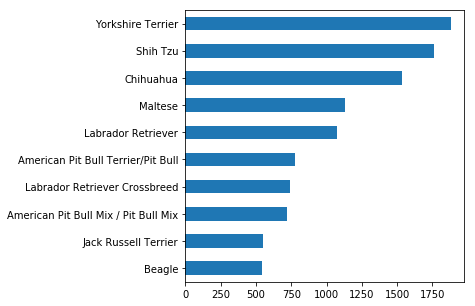

In [344]:
(df_dogs['Primary Breed']
 .value_counts()
 .nlargest(10)
 .sort_values(ascending=True)
 .plot(
     kind='barh', 
     figsize=(5,5)
 ))

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [345]:
(df_dogs['Primary Breed']
 .value_counts()
 .head(10))

Yorkshire Terrier                       1882
Shih Tzu                                1760
Chihuahua                               1535
Maltese                                 1133
Labrador Retriever                      1074
American Pit Bull Terrier/Pit Bull       780
Labrador Retriever Crossbreed            738
American Pit Bull Mix / Pit Bull Mix     722
Jack Russell Terrier                     553
Beagle                                   546
Name: Primary Breed, dtype: int64

## What are the most popular dog names?

In [346]:
(df_dogs['Animal Name']
 .value_counts()
 .head(10))

Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: Animal Name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [347]:
names = [
    'Mathieu',
    'Max',
    'Maxwell'
]

(df_dogs[df_dogs['Animal Name'].isin(names)]['Animal Name']
 .value_counts())

Max        202
Maxwell     11
Name: Animal Name, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [348]:
df_dogs['Guard or Trained'].value_counts(normalize=True)

No     0.999143
Yes    0.000857
Name: Guard or Trained, dtype: float64

In [349]:
# or
len(df_dogs[df_dogs['Guard or Trained'] == 'Yes']) / len(df_dogs) * 100

0.05666666666666667

## What are the actual numbers?

In [350]:
len(df_dogs[df_dogs['Guard or Trained'] == 'Yes'])

17

In [351]:
len(df_dogs[df_dogs['Guard or Trained'] == 'No'])

19809

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [352]:
(len(df_dogs[df_dogs['Guard or Trained'] == 'Yes']) + 
 len(df_dogs[df_dogs['Guard or Trained'] == 'No']) == len(df_dogs))

False

In [353]:
(df_dogs[(df_dogs['Guard or Trained'] != 'Yes') & 
         (df_dogs['Guard or Trained'] != 'No')]
 .head())

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
11,11232,muneca,F,Beagle,NaN,White,Black,Brown,2013-05-01,Yes,NaN,Yes,2014-09-13 00:58:36.603,2014-09-13,2019-09-13


## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [354]:
df_dogs.loc[(df_dogs['Guard or Trained'] != 'Yes') & 
         (df_dogs['Guard or Trained'] != 'No'), 'Guard or Trained'] = 'No'

In [355]:
# or
df_dogs['Guard or Trained'].fillna("No", inplace=True)

In [356]:
df_dogs.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## What are the top dog breeds for guard dogs? 

In [357]:
(df_dogs[(df_dogs['Guard or Trained'] == 'Yes') 
         & (df_dogs['Primary Breed'] != 'Unknown')]
 .groupby('Primary Breed')['Guard or Trained']
 .value_counts()
 .sort_values(ascending=False))

Primary Breed               Guard or Trained
German Shepherd Dog         Yes                 3
Yorkshire Terrier           Yes                 1
Shih Tzu                    Yes                 1
Schnauzer, Miniature        Yes                 1
Rottweiler                  Yes                 1
Poodle, Standard            Yes                 1
Labrador Retriever          Yes                 1
Golden Retriever            Yes                 1
German Shepherd Crossbreed  Yes                 1
Doberman Pinscher           Yes                 1
Name: Guard or Trained, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [358]:
df_dogs['year'] = df_dogs['Animal Birth'].apply(lambda birth: birth.year)

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [359]:
df_dogs['age'] = datetime.datetime.now().year - df_dogs['year']

In [360]:
df_dogs['age'].mean()

7.7124333333333333

# Joining data together

In [361]:
df_neighborhoods = pd.read_csv('zipcodes-neighborhoods.csv')

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [362]:
df_merged = (df_dogs.merge(
    df_neighborhoods, 
    left_on='Owner Zip Code', 
    right_on='zip', 
    how='outer'))

## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [363]:
neighborhoods = [
    'Bronx',
    'Brooklyn',
    'Upper East Side'
]

(df_merged[(df_merged['borough'].isin(neighborhoods)) |
          (df_merged['neighborhood'].isin(neighborhoods))]
 .groupby('borough')['Animal Name']
 .value_counts()
 .groupby(
     level=0, 
     group_keys=False)
 .nlargest(1))

borough    Animal Name
Bronx      Bella          22
Brooklyn   Max            46
Manhattan  Charlie        19
Name: Animal Name, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [364]:
(df_merged[df_merged['Primary Breed'] != 'Unknown']
 .groupby('neighborhood')['Primary Breed']
 .value_counts()
 .groupby(
     level=0,          # If the axis is a MultiIndex (hierarchical),
     group_keys=False) # group by a particular level or levels
                       # The group_keys option leaves only the MultiIndex of the Series returned 
 .nlargest(1))

neighborhood                   Primary Breed                       
Borough Park                   Yorkshire Terrier                        49
Bronx Park and Fordham         Yorkshire Terrier                        39
Bushwick and Williamsburg      Yorkshire Terrier                        47
Canarsie and Flatlands         Shih Tzu                                 56
Central Bronx                  Yorkshire Terrier                        29
Central Brooklyn               Shih Tzu                                 52
Central Harlem                 Chihuahua                                48
Central Queens                 Yorkshire Terrier                        34
Chelsea and Clinton            Chihuahua                                80
East Harlem                    Yorkshire Terrier                        44
East New York and New Lots     Yorkshire Terrier                        25
Flatbush                       Shih Tzu                                 38
Gramercy Park and Murray Hill  Y

## What breed of dogs are the least likely to be spayed? Male or female?

In [365]:
# all the percentages
(df_merged
 .groupby(['Primary Breed', 'Spayed or Neut'])['Spayed or Neut']
 .value_counts()
 .groupby(level=0)
 .apply(lambda x:100 * x / float(x.sum())))

Primary Breed                         Spayed or Neut  Spayed or Neut
Affenpinscher                         No              No                 60.000000
                                      Yes             Yes                40.000000
Afghan Hound                          No              No                 20.000000
                                      Yes             Yes                80.000000
Airedale Terrier                      No              No                 25.000000
                                      Yes             Yes                75.000000
Akita                                 No              No                 18.918919
                                      Yes             Yes                81.081081
Akita Crossbreed                      No              No                 17.647059
                                      Yes             Yes                82.352941
Alaskan Malamute                      No              No                 25.000000
                  

In [394]:
# Only the less likely to be spayed
(df_merged
 .groupby('Primary Breed')
 .apply(lambda x: x[x['Spayed or Neut'] == 'No']['Spayed or Neut'].count() / len(x))
 .nlargest(20))

Primary Breed
Borzoi                                 1.000000
Canaan Dog                             1.000000
Dogo Argentino                         1.000000
Fila Brasileiro                        1.000000
French Spaniel                         1.000000
Karelian Bear Dog                      1.000000
Kooikerhondje                          1.000000
Mastiff, French (Dogue de Bordeaux)    1.000000
Mastiff, Tibetan                       1.000000
Mudi                                   1.000000
Polish Hound                           1.000000
Treeing Tennessee Brindle              1.000000
Greater Swiss Mountain Dog             0.666667
Lagotto Romagnolo                      0.666667
American Bully                         0.647059
Morkie                                 0.606061
Affenpinscher                          0.600000
Miniature American Shepherd            0.571429
Maltipoo                               0.538462
Shih Tzu Crossbreed                    0.519685
dtype: float64

In [367]:
# All the percentages
gender = ['M', 'F']

(df_merged[df_merged['Animal Gender'].isin(gender)]
 .groupby('Animal Gender')['Spayed or Neut']
 .value_counts()
 .groupby(level=0)
 .apply(lambda x: 100 * x / float(x.sum())))

Animal Gender  Spayed or Neut
F              Yes               85.784992
               No                14.215008
M              Yes               79.185632
               No                20.814368
Name: Spayed or Neut, dtype: float64

In [368]:
# Only the less likely to be spayed
(df_merged[df_merged['Animal Gender'].isin(gender)]
 .groupby('Animal Gender')
 .apply(lambda x: x[x['Spayed or Neut'] == 'No']['Spayed or Neut'].count() / len(x))
 .nlargest(1))

Animal Gender
M    0.208144
dtype: float64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [369]:
mono_colors = [
    'black',
    'white',
    'gray',
    'grey'
]

In [370]:
df_merged['monochrome'] = (
    (df_merged['Animal Dominant Color'].str.lower().isin(mono_colors)) &
    (df_merged['Animal Secondary Color'].str.lower().isin(mono_colors)) &
    (df_merged['Animal Third Color'].str.lower().isin(mono_colors))
)

In [371]:
len(df_merged[df_merged['monochrome'] == True])

409

## How many dogs are in each borough? Plot it in a graph.

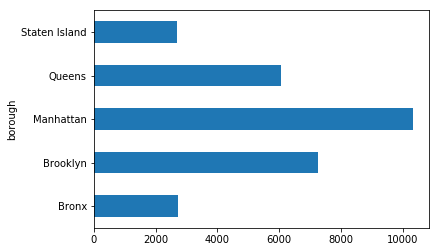

In [372]:
(df_merged.groupby('borough')['Animal Name']
 .count()
 .plot(kind='barh'))

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [373]:
df_population = pd.read_csv('boro_population.csv')

In [378]:
(df_merged
 .groupby('borough') # Group by borough
 .apply(lambda x: (
     x['Animal Name'].count() / # For each borough, count the number of dogs
     df_population[df_population['borough'] == x['borough'].iloc[0]] # Looking for the right row in population df
                                                                     # Get the first row of the borough and get
                                                                     # its name - all the rows have the same name
         ['population'] # Get the population value
         .astype(int)
 )).nlargest(1))

borough     
Manhattan  0    0.006275
Name: population, dtype: float64

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1126cc390>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11039cb70>], dtype=object)

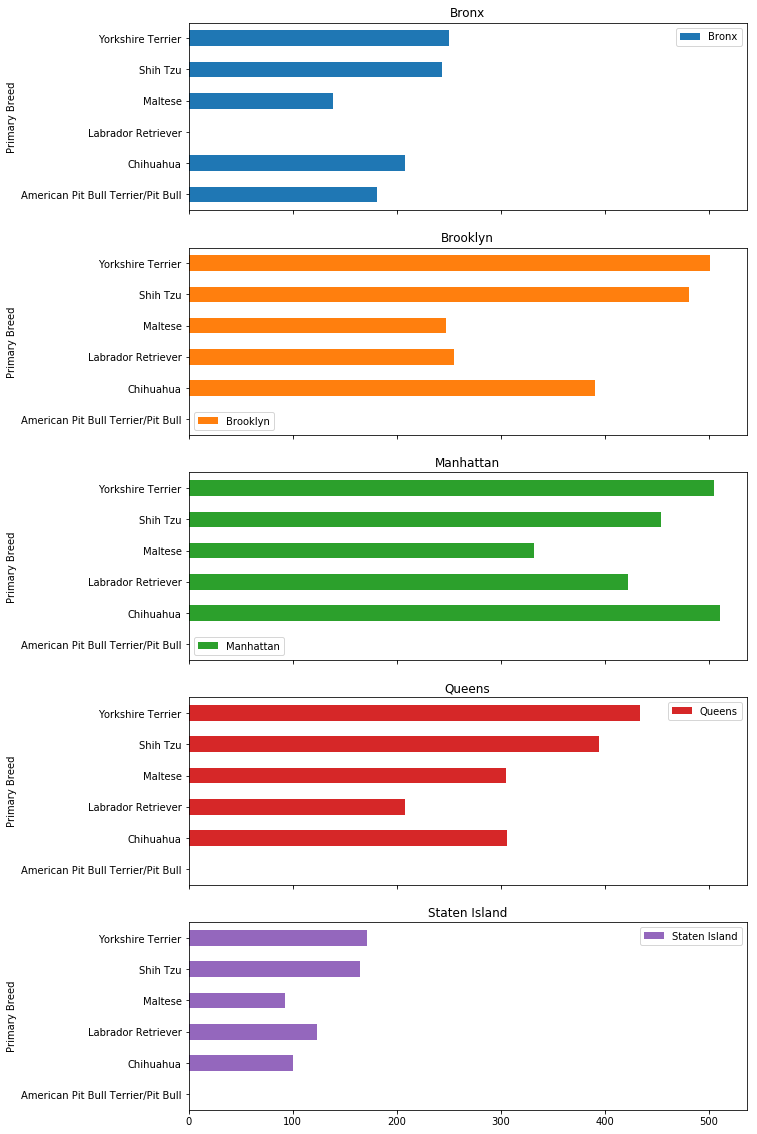

In [393]:
(df_merged
 .groupby('borough')['Primary Breed']
 .value_counts()
 .groupby(
     level=0, 
     group_keys=False)
 .nlargest(5)
 .unstack(0)
 .plot(
     kind='barh', 
     subplots=True, 
     figsize=(10, 20)))

## What percentage of dogs are not guard dogs?

In [376]:
(df_merged['Guard or Trained']
 .value_counts(normalize=True)
 .apply(lambda x: str(round(x * 100, 2)) + '%' ))

No     99.94%
Yes     0.06%
Name: Guard or Trained, dtype: object